In [1]:
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install mdatagen
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install numpy scipy sklearn
!pip install jax
!pip install chex
!pip install attr
!pip install optax



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not find a version that satisfies the requirement sklearn (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for sklearn



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import sys
sys.path.append(r"C:\Users\zhossai3\Desktop\Fair_Imputation") 


import Utils
import CMI
import Inject_Missing_Values
import RR_imputer
import Sinkhorn_CMI
import SinkhornImputation
import SoftImpute



c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)


In [3]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd

from geomloss import SamplesLoss

from sklearn.preprocessing import scale
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler

from Utils import *
from SoftImpute import softimpute, cv_softimpute
from SinkhornImputation import SinkhornImputation
from Sinkhorn_CMI import *
from RR_imputer import RRimputer
import matplotlib.pyplot as plt
from CMI import *

from Inject_Missing_Values import *

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")
import pandas as pd

torch.set_default_tensor_type('torch.DoubleTensor')

**Load Data**

In [4]:
import pandas as pd

# Read CSV file into a Pandas DataFrame
groundTruth = pd.read_csv(r'C:\Users\zhossai3\Desktop\Fair_Imputation\Data\German Credit\German_Credit_Ground_Truth.csv', delimiter=',', header=0)

# Store feature columns in a DataFrame


X= groundTruth.iloc[:, :-1]  # Selects all rows and all columns except the last one
Y = groundTruth.iloc[:, -1]  # Selects all rows and only the last column


In [5]:
groundTruth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   checking-account                       1000 non-null   int64
 1   duration                               1000 non-null   int64
 2   credit-history                         1000 non-null   int64
 3   purpose                                1000 non-null   int64
 4   credit-amount                          1000 non-null   int64
 5   savings-account                        1000 non-null   int64
 6   employment-since                       1000 non-null   int64
 7   installment-rate                       1000 non-null   int64
 8   other-debtors                          1000 non-null   int64
 9   residence-since                        1000 non-null   int64
 10  property                               1000 non-null   int64
 11  age                            

Checking Number of unique values

In [6]:
groundTruth.nunique()

checking-account                           4
duration                                  33
credit-history                             5
purpose                                   10
credit-amount                            921
savings-account                            5
employment-since                           5
installment-rate                           4
other-debtors                              3
residence-since                            4
property                                   4
age                                       53
other-installment                          3
housing                                    3
existing-credits                           4
job                                        4
number-people-provide-maintenance-for      2
telephone                                  2
foreign-worker                             2
sex                                        2
marital-status                             2
class-label                                2
dtype: int

In [7]:
groundTruth.head(5)

,checking-account,duration,credit-history,purpose,credit-amount,savings-account,employment-since,installment-rate,other-debtors,residence-since,...,other-installment,housing,existing-credits,job,number-people-provide-maintenance-for,telephone,foreign-worker,sex,marital-status,class-label
0,1,6,0,7,1169,4,3,4,2,4,...,1,1,2,0,1,1,1,1,0,1
1,0,48,1,7,5951,2,0,2,2,2,...,1,1,1,0,1,0,1,0,0,0
2,3,12,0,4,2096,2,1,2,2,3,...,1,1,1,1,2,0,1,1,0,1
3,1,42,1,5,7882,2,1,2,1,4,...,1,0,1,0,2,0,1,1,0,1
4,1,24,2,1,4870,2,0,3,2,4,...,1,0,2,0,2,0,1,1,0,0


In [8]:

scaler = StandardScaler()
groundTruth_scaled = pd.DataFrame(scaler.fit_transform(groundTruth), columns=groundTruth.columns)
print(groundTruth_scaled)


     checking-account  duration  credit-history   purpose  credit-amount  \
0           -0.464594 -1.236478       -1.031578  1.151303      -0.745131   
1           -1.262865  2.248194       -0.022206  1.151303       0.949817   
2            1.131948 -0.738668       -1.031578  0.047818      -0.416562   
3           -0.464594  1.750384       -0.022206  0.415646       1.634247   
4           -0.464594  0.256953        0.987166 -1.055668       0.566664   
..                ...       ...             ...       ...            ...   
995          1.131948 -0.738668       -0.022206  0.415646      -0.544162   
996         -0.464594  0.754763       -0.022206 -0.687839       0.207612   
997          1.131948 -0.738668       -0.022206  1.151303      -0.874503   
998         -0.464594  1.999289       -0.022206  1.151303      -0.505528   
999         -1.262865  1.999289       -1.031578 -0.687839       0.462457   

     savings-account  employment-since  installment-rate  other-debtors  \
0           

In [9]:
X= groundTruth_scaled.iloc[:, :-1]  # Selects all rows and all columns except the last one
Y = groundTruth_scaled.iloc[:, -1]  # Selects all rows and only the last column

In [10]:
print("checking-account ",groundTruth_scaled['checking-account'].unique())
print("duration",groundTruth_scaled['duration'].unique())
print("credit-history",groundTruth_scaled['credit-history'].unique())
print("purpose",groundTruth_scaled['purpose'].unique())
#print("credit-amount",groundTruth_scaled['credit-amount'].unique())
print("savings-account",groundTruth_scaled['savings-account'].unique())
print("employment-since",groundTruth_scaled['employment-since'].unique())
print("other-debtors",groundTruth_scaled['other-debtors'].unique())
print("residence-since",groundTruth_scaled['residence-since'].unique())
print("property",groundTruth_scaled['property'].unique())
print("age",groundTruth_scaled['age'].unique())
print("other-installment",groundTruth_scaled['other-installment'].unique())
print("housing",groundTruth_scaled['housing'].unique())
print("existing-credits",groundTruth_scaled['existing-credits'].unique())
print("job",groundTruth_scaled['job'].unique())
print("number-people-provide-maintenance-for",groundTruth_scaled['number-people-provide-maintenance-for'].unique())
print("telephone",groundTruth_scaled['telephone'].unique())
print("foreign-worker",groundTruth_scaled['foreign-worker'].unique())
print("sex",groundTruth_scaled['sex'].unique())
print("marital-status",groundTruth_scaled['marital-status'].unique())
print("class-label",groundTruth_scaled['class-label'].unique())

checking-account  [-0.4645937  -1.26286467  1.13194823  0.33367726]
duration [-1.23647786  2.24819436 -0.73866754  1.75038404  0.25695309  1.25257373
  0.75476341 -0.48976238 -0.9875727  -0.90460432 -1.15350947  3.243815
 -0.24085723  1.9992892  -0.82163593  0.50585825 -1.07054109  2.74600468
 -0.07492045 -0.57273077  1.00366857  0.00804793 -0.406794   -1.40241463
  2.16522598 -0.65569916  0.09101632  1.50147889  0.58882664 -1.31944625
  0.42288986  4.23943563  1.58444727]
credit-history [-1.03157831 -0.02220619  0.98716594  1.99653807  3.0059102 ]
purpose [ 1.15130343  0.04781771  0.41564629 -1.055668   -0.68783943 -1.42349657
 -0.32001086  1.519132    0.78347486  1.88696057]
savings-account [ 1.66990103 -0.13053135 -1.03074754  0.76968484 -1.93096373]
employment-since [ 1.09776229 -1.13497457 -0.39072895  1.84200791  0.35351667]
other-debtors [ 0.30110915 -1.94597406 -4.19305728]
residence-since [ 1.04698668 -0.76597727  0.14050471 -1.67245924]
property [-1.26399248 -0.44108071  0.38

Converting GroudTruth to Tensor

In [11]:
groundTruth_tensor = torch.tensor((groundTruth_scaled.to_numpy()))

In [12]:
print(torch.unique(groundTruth_tensor[:,19])) # coloumn 19 is sex where 1 is male and 0 is female.after scaling male is 0.6703 and female is -1.4919

tensor([-1.4919,  0.6703])


In [13]:
print("minimum: ",groundTruth_tensor.min())
print("maximum:",groundTruth_tensor.max())
print("mean: ",groundTruth_tensor.mean())
print("median: ", groundTruth_tensor.median())

minimum:  tensor(-5.1017)
maximum: tensor(5.3708)
mean:  tensor(1.2919e-18)
median:  tensor(-0.0222)


Determining the appropriate columns for bucketization along with their respective bucket sizes, and identifying the variables X, Y, and Z for Conditional Mutual Information (CMI) computation.

In [14]:
bucket_specs = {
     
    11: 4,   # Column 11 → age (4 bins)
    19: 2,  # Column 19 → sex (2 bins) [male : 1, female: 0]
    21: 2,  # Column 21 → label  (2 bins)
    5: 5,   # Column 5 → savings-account (5 bins)
    15: 4,   # Column 15 → jobs (4 bins)
    0: 4, #column 0 -> checking-account (4 bins)
    3: 10, #column 3 -> purpose (10 bins)
    1: 5,  #column 1 -> duration (5 bins)
    2: 5, #column 2 -> credit history (5 bins)
    6: 5, #employment-since
    18:2,
    4:10
    
}

# Define multiple attributes for X, Y, Z
X_cols = [11,18,19]  # Bucketized sensitive attributes (e.g., sex, race, age)
Y_cols = [21]     # Bucketized outcome-related attributes
Z_cols = [1,2,4,5]  


**CMI for GroundTruth**

In [15]:
#groundTruth_tensor = groundTruth_tensor.float()
groundTruth_tensor.requires_grad=True
cmi_groundTruth = CMI.c_m_i(groundTruth_tensor,bucket_specs,X_cols, Y_cols, Z_cols)
print(cmi_groundTruth)

H(X|Z): 1.3788250649067137, H(Y|Z): 0.37686026462661903, H(X,Y|Z): 1.553329852850423
tensor(0.2024, grad_fn=<ClampBackward1>)


Generating MCAR 25%, and added the target coloumn with the 25% missing MCAR data

In [16]:
generator_mcar25 = Inject_Missing_Values()
miss_mcar25,index_mcar25 = generator_mcar25.MCAR(X,missing_rate=25)
print(type(miss_mcar25))
total_missing_percentage_mar25= miss_mcar25.isnull().sum().sum() / miss_mcar25.size * 100
print(f"Total Missing Percentage MAR25: {total_missing_percentage_mar25:.2f}%")

missing_percentage = (miss_mcar25.isnull().sum() / len(miss_mcar25)) * 100
print(missing_percentage)

miss_mcar25 = pd.concat([miss_mcar25, Y], axis=1) #adding the target coloumn

<class 'pandas.core.frame.DataFrame'>
Total Missing Percentage MAR25: 25.00%
checking-account                         26.9
duration                                 25.6
credit-history                           23.3
purpose                                  24.6
credit-amount                            27.4
savings-account                          25.4
employment-since                         24.3
installment-rate                         25.6
other-debtors                            26.6
residence-since                          22.7
property                                 24.0
age                                      26.3
other-installment                        25.7
housing                                  24.1
existing-credits                         24.1
job                                      25.8
number-people-provide-maintenance-for    25.8
telephone                                24.4
foreign-worker                           25.0
sex                                      22.9
mar

In [17]:
miss_mcar25_numpy = miss_mcar25.to_numpy()
miss_mcar25_tensor = torch.tensor(miss_mcar25_numpy) #converting to tensor

In [18]:
print(torch.unique(miss_mcar25_tensor[:,19]))

tensor([-1.4919,  0.6703,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan,     n

Applying Sinkhorn algorithm to MCAR 25% data

In [19]:
#only Sinkhorn
n_mcar25, d_mcar25 = miss_mcar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar25 = pick_epsilon(miss_mcar25_tensor)
print(epsilon_mcar25)
mask_mcar25 = torch.isnan(miss_mcar25_tensor).double()


on_sk_imputer_mcar25 = SinkhornImputation(eps=epsilon_mcar25, batchsize=batchsize, lr=lr, niter=5000)
on_sk_imp_mcar25, on_sk_maes25mcar, on_sk_rmses25mcar = on_sk_imputer_mcar25.fit_transform(miss_mcar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mcar25_numpy = on_sk_imp_mcar25.detach().cpu().numpy()
on_sk_mae_mcar25 = MAE(on_sk_imp_mcar25,groundTruth_tensor , mask_mcar25)
on_sk_rmse_mcar25 = RMSE(on_sk_imp_mcar25, groundTruth_tensor, mask_mcar25)
print("MAE:", on_sk_mae_mcar25)


0.7805976625995804


INFO:root:batchsize = 128, epsilon = 0.7806
INFO:root:Iteration 0:	 Loss: 5.4385	 Validation MAE: 0.7644	RMSE: 0.9895
INFO:root:Iteration 50:	 Loss: 5.7131	 Validation MAE: 0.6932	RMSE: 0.9695
INFO:root:Iteration 100:	 Loss: 5.7417	 Validation MAE: 0.6793	RMSE: 0.9638
INFO:root:Iteration 150:	 Loss: 6.0250	 Validation MAE: 0.6749	RMSE: 0.9626
INFO:root:Iteration 200:	 Loss: 5.3433	 Validation MAE: 0.6730	RMSE: 0.9610
INFO:root:Iteration 250:	 Loss: 5.9251	 Validation MAE: 0.6710	RMSE: 0.9607
INFO:root:Iteration 300:	 Loss: 5.5773	 Validation MAE: 0.6702	RMSE: 0.9615
INFO:root:Iteration 350:	 Loss: 5.9724	 Validation MAE: 0.6683	RMSE: 0.9615
INFO:root:Iteration 400:	 Loss: 6.3052	 Validation MAE: 0.6678	RMSE: 0.9610
INFO:root:Iteration 450:	 Loss: 5.8963	 Validation MAE: 0.6678	RMSE: 0.9613
INFO:root:Iteration 500:	 Loss: 5.7582	 Validation MAE: 0.6670	RMSE: 0.9615
INFO:root:Iteration 550:	 Loss: 5.2850	 Validation MAE: 0.6668	RMSE: 0.9621
INFO:root:Iteration 600:	 Loss: 5.5223	 Validat

MAE: tensor(0.6672, grad_fn=<DivBackward0>)


Calculating CMI after applying the Sinkhorn Imputation (only Sinkhorn algorithm)

In [20]:
#only CMI
on_cmi_missmcar25 = CMI.c_m_i(on_sk_imp_mcar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:", on_cmi_missmcar25)
print("MAE:",on_sk_mae_mcar25)

H(X|Z): 1.3978588837474097, H(Y|Z): 0.30677078419411963, H(X,Y|Z): 1.5235706475783743
CMI: tensor(0.1811, grad_fn=<ClampBackward1>)
MAE: tensor(0.6672, grad_fn=<DivBackward0>)


Applying Sinkhorn-CMI algorithm to MCAR 25%

In [21]:
#sinkhorn_CMI
n_mcar25, d_mcar25 = miss_mcar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar25 = pick_epsilon(miss_mcar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mcar25)
mask_mcar25  = torch.isnan(miss_mcar25_tensor).double()


sk_imputer_mcar25 = SinkhornImputation_CMI(eps=epsilon_mcar25, batchsize=batchsize, lr=lr, niter=5000,highest_lamda_cmi = 500)
sk_imp_mcar25, sk_maes25mcar, sk_rmses25mcar,cmi_loss_mcar25,sinkhorn_loss_mcar25, lamda_cmi_mcar25 = sk_imputer_mcar25.fit_transform(miss_mcar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mcar25_numpy = sk_imp_mcar25.detach().cpu().numpy()

sk_mae_mcar25 = MAE(sk_imp_mcar25,groundTruth_tensor , mask_mcar25)
sk_rmse_mcar25 = RMSE(sk_imp_mcar25, groundTruth_tensor, mask_mcar25)
print("MAE:",sk_mae_mcar25)





0.7805976625995804


INFO:root:Iteration 0:	 Loss: 5.5771	 Validation MAE: 0.7667	RMSE: 0.9926
INFO:root:Iteration 50:	 Loss: 6.0612	 Validation MAE: 0.7000	RMSE: 0.9781
INFO:root:Iteration 100:	 Loss: 5.7869	 Validation MAE: 0.6869	RMSE: 0.9715
INFO:root:Iteration 150:	 Loss: 5.9817	 Validation MAE: 0.6841	RMSE: 0.9720
INFO:root:Iteration 200:	 Loss: 5.6504	 Validation MAE: 0.6818	RMSE: 0.9706
INFO:root:Iteration 250:	 Loss: 5.8034	 Validation MAE: 0.6811	RMSE: 0.9723
INFO:root:Iteration 300:	 Loss: 5.2235	 Validation MAE: 0.6813	RMSE: 0.9739
INFO:root:Iteration 350:	 Loss: 5.8008	 Validation MAE: 0.6820	RMSE: 0.9756
INFO:root:Iteration 400:	 Loss: 6.1273	 Validation MAE: 0.6824	RMSE: 0.9772
INFO:root:Iteration 450:	 Loss: 6.3799	 Validation MAE: 0.6818	RMSE: 0.9775
INFO:root:Iteration 500:	 Loss: 5.7239	 Validation MAE: 0.6815	RMSE: 0.9779
INFO:root:Iteration 550:	 Loss: 5.7455	 Validation MAE: 0.6807	RMSE: 0.9778
INFO:root:Iteration 600:	 Loss: 5.6695	 Validation MAE: 0.6800	RMSE: 0.9779
INFO:root:Itera

MAE: tensor(0.6869, grad_fn=<DivBackward0>)


CMI for Sinkhorn_CMI Imputation

In [22]:
#CMI
sk_cmi_mcar25 = CMI.c_m_i(sk_imp_mcar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI",sk_cmi_mcar25)
print("MAE",sk_mae_mcar25)

H(X|Z): 1.1625462049085487, H(Y|Z): 0.20773104216530136, H(X,Y|Z): 1.3712126607131498
CMI tensor(0.0001, grad_fn=<ClampBackward1>)
MAE tensor(0.6869, grad_fn=<DivBackward0>)


Mean imputation, MAE and CMI

In [23]:

mean_imp_mcar25 = SimpleImputer().fit_transform(miss_mcar25_tensor)
mean_imp_mcar25_torch = torch.tensor(mean_imp_mcar25)
mean_mae_mcar25 = MAE(mean_imp_mcar25_torch, groundTruth_tensor , mask_mcar25)

print("MAE",mean_mae_mcar25)

cmi_mean_mcar25 = CMI.c_m_i(mean_imp_mcar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI",cmi_mean_mcar25)

MAE tensor(0.7623, grad_fn=<DivBackward0>)
H(X|Z): 1.6537541610292728, H(Y|Z): 0.3676024965749818, H(X,Y|Z): 1.8215659114981584
CMI tensor(0.1998, grad_fn=<ClampBackward1>)


Imputation by Chained Equations, CMI and MAE

In [24]:
ice_imp_mcar25 = IterativeImputer(random_state=0, max_iter=500).fit_transform(miss_mcar25_tensor)
ice_imp_mcar25_torch = torch.tensor(ice_imp_mcar25)
ice_mae_mcar25 = MAE(ice_imp_mcar25_torch, groundTruth_tensor , mask_mcar25)
print("MAE",ice_mae_mcar25)

cmi_ice_mcar25 = CMI.c_m_i(ice_imp_mcar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI",cmi_ice_mcar25)

MAE tensor(0.7199, grad_fn=<DivBackward0>)
H(X|Z): 1.5131357323564574, H(Y|Z): 0.3225907095109859, H(X,Y|Z): 1.6184046991813021
CMI tensor(0.2173, grad_fn=<ClampBackward1>)


Soft Imputation CMI and MAE

In [25]:
cv_error_mcar25, grid_lambda_mcar25 = cv_softimpute(miss_mcar25_numpy, grid_len=15)
lbda_mcar25 = grid_lambda_mcar25[np.argmin(cv_error_mcar25)]
soft_imp_mcar25 = softimpute((miss_mcar25_numpy), lbda_mcar25)[1]
soft_imp_mcar25_torch = torch.tensor(soft_imp_mcar25)

soft_mae_mcar25 = MAE(soft_imp_mcar25_torch, groundTruth_tensor , mask_mcar25)
print("MAE",soft_mae_mcar25)

cmi_soft_mcar25 = CMI.c_m_i(soft_imp_mcar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI",cmi_soft_mcar25)

MAE tensor(0.7168, grad_fn=<DivBackward0>)
H(X|Z): 1.6107064504173563, H(Y|Z): 0.33454611385886235, H(X,Y|Z): 1.7463448207737802
CMI tensor(0.1989, grad_fn=<ClampBackward1>)


### Visualization

Sinkhorn loss vs Sinkhorn Iteration

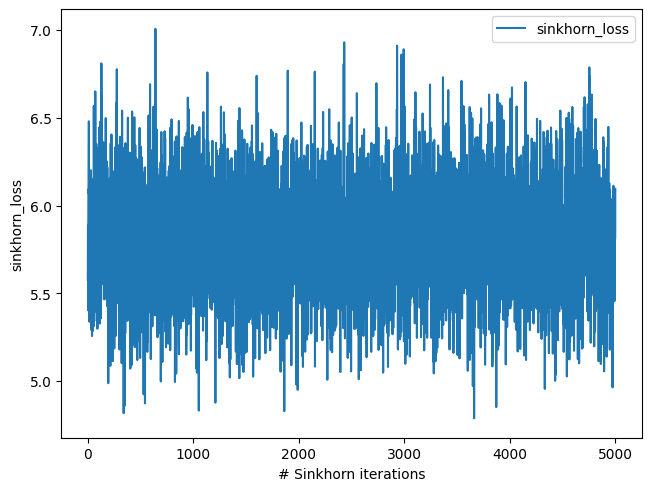

In [26]:
sinkhorn_loss_mcar25 = torch.tensor(sinkhorn_loss_mcar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mcar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mcar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

CMI and MAE vs Sinkhorn Iterations

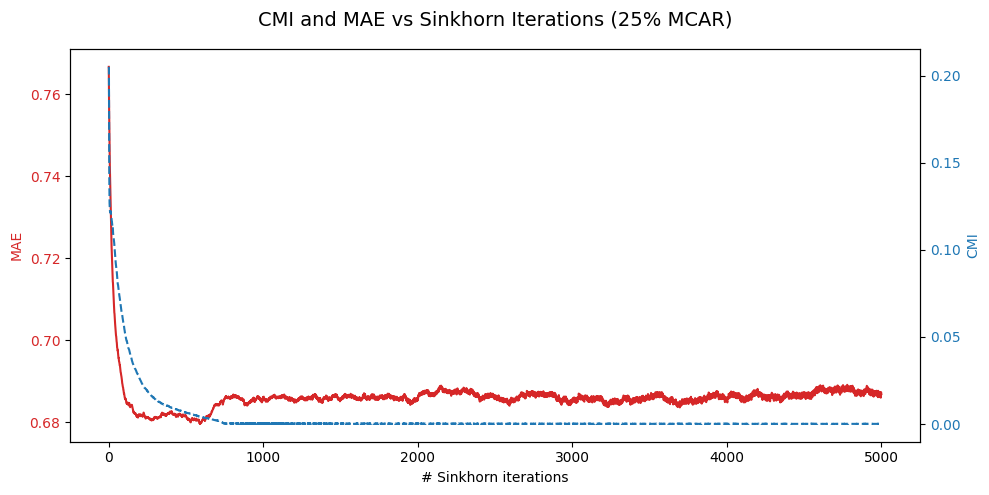

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with actual PyTorch tensors if needed)
# Convert to NumPy if these are tensors
cmi_array = cmi_loss_mcar25
mae_array = sk_maes25mcar

# Ensure both arrays are same length (or handle separately if needed)
npoints = min(len(cmi_array), len(mae_array))
x = np.linspace(0, 1, npoints) * npoints  # X-axis: Sinkhorn iterations

# Truncate both arrays to the same length for plotting
cmi_array = cmi_array[:npoints]
mae_array = mae_array[:npoints]

# Create a single plot with twin y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot MAE (left axis)
color = 'tab:red'
ax1.set_xlabel('# Sinkhorn iterations')
ax1.set_ylabel('MAE', color=color)
ax1.plot(x, mae_array, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# Plot CMI (right axis)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(x, cmi_array, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

# Titles and layout
fig.suptitle('CMI and MAE vs Sinkhorn Iterations (25% MCAR)', fontsize=14)
fig.tight_layout()
plt.show()


MAE and CMI vs lambda_cmi

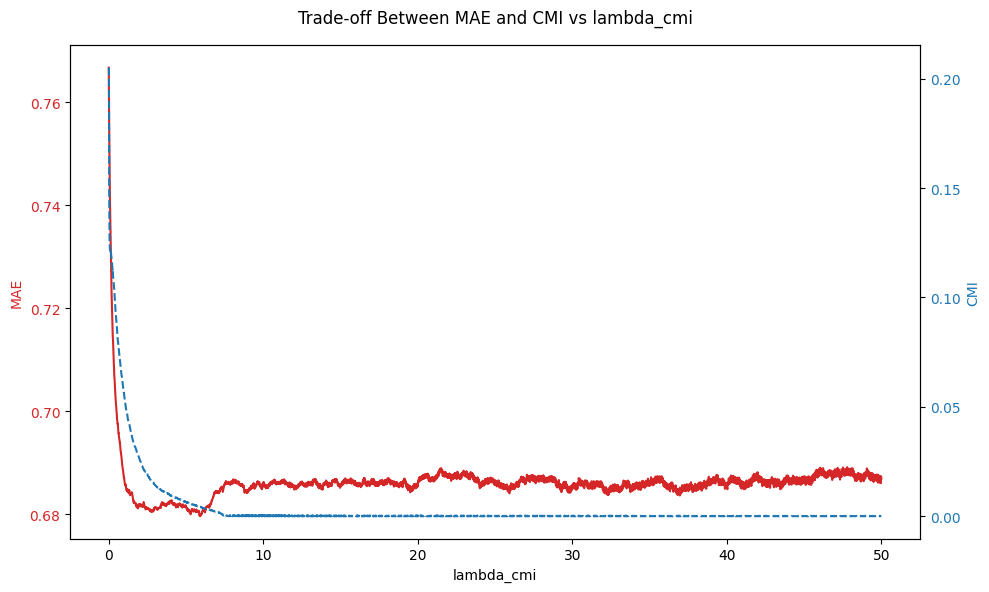

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated from your training log — you should replace these with actual histories
cmi_penalty_history = cmi_loss_mcar25 # list of length 2000 from your model
mae_history = sk_maes25mcar         # list of length 2000 from your model

iterations = np.arange(len(cmi_penalty_history))
lambda_cmi_values = lamda_cmi_mcar25

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# MAE
color = 'tab:red'
ax1.set_xlabel('lambda_cmi')
ax1.set_ylabel('MAE', color=color)
ax1.plot(lambda_cmi_values, mae_history, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# CMI on same plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(lambda_cmi_values, cmi_penalty_history, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Trade-off Between MAE and CMI vs lambda_cmi')
fig.tight_layout()
plt.show()


In [29]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Convert to arrays
mae_array_mcar25 = np.array(sk_maes25mcar)
cmi_array_mcar25 = np.array(cmi_loss_mcar25)
lambda_array_mcar25 = np.array(lamda_cmi_mcar25)

# OPTIONAL: Skip very low lambda values (e.g., lambda = 0)
min_index = 10  # or 0 if you want to include everything

# ---- Option 1: Visual Match (Rescale CMI to MAE's range) ----
min_mae_mcar25, max_mae_mcar25 = mae_array_mcar25.min(), mae_array_mcar25.max()
min_cmi_mcar25, max_cmi_mcar25 = cmi_array_mcar25.min(), cmi_array_mcar25.max()

# Rescale CMI to the MAE axis range
cmi_rescaled_mcar25 = (cmi_array_mcar25 - min_cmi_mcar25) / (max_cmi_mcar25 - min_cmi_mcar25) * (max_mae_mcar25 - min_mae_mcar25) + min_mae_mcar25

# Compute difference between MAE and rescaled CMI
diff_mcar25 = np.abs(mae_array_mcar25[min_index:] - cmi_rescaled_mcar25[min_index:])
intersection_idx_mcar25 = np.argmin(diff_mcar25) + min_index  # add offset

# ---- Extract Values at Intersection ----
lambda_intersection_mcra25 = lambda_array_mcar25[intersection_idx_mcar25]
mae_val_mcar25 = mae_array_mcar25[intersection_idx_mcar25]
cmi_val_mcar25 = cmi_array_mcar25[intersection_idx_mcar25]

# ---- Display Result ----
print("Estimated Visual Intersection Point MCAR25:")
print(f"  lambda_cmi_mcar25 = {lambda_intersection_mcra25:.4f}")
print(f"  MAE_mcar25        = {mae_val_mcar25:.4f}")
print(f"  CMI_mcar25        = {cmi_val_mcar25:.4f}")


Estimated Visual Intersection Point MCAR25:
  lambda_cmi_mcar25 = 6.2900
  MAE_mcar25        = 0.6810
  CMI_mcar25        = 0.0034


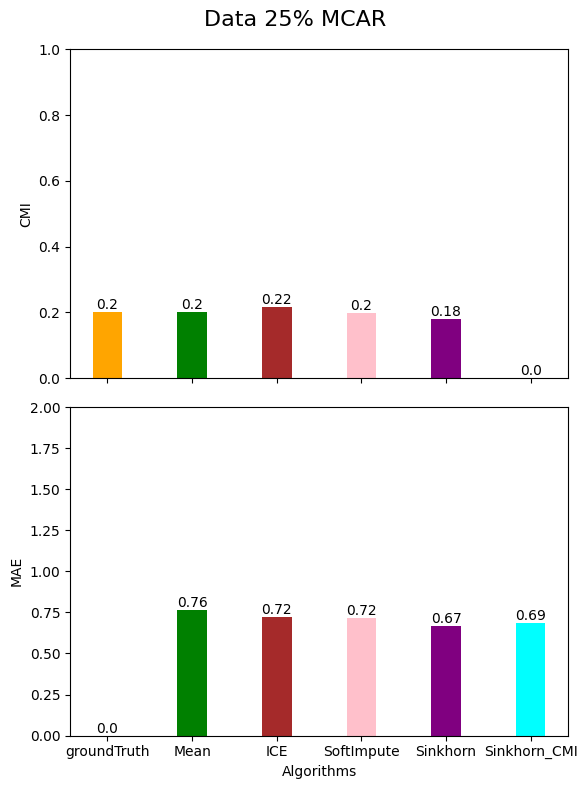

In [30]:

# Define values and categories
values_cmi_mcar25 = [cmi_groundTruth.detach(),cmi_mean_mcar25.detach(),cmi_ice_mcar25.detach(),cmi_soft_mcar25.detach(),on_cmi_missmcar25.detach(),sk_cmi_mcar25.detach()]
values_maes_mcar25 = [0.0,mean_mae_mcar25.detach(),ice_mae_mcar25.detach(), soft_mae_mcar25.detach(),on_sk_mae_mcar25.detach(),sk_mae_mcar25.detach()]
categories = ["groundTruth","Mean","ICE","SoftImpute","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange','green','brown','pink','purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MCAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mcar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAE bars and add values on top
bars2 = ax2.bar(index, values_maes_mcar25, color=colors, width=bar_width)
ax2.set_ylabel("MAE")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()


**25% MAR**

In [ ]:
mean_age = groundTruth_scaled["age"].mean()
median_employment = groundTruth_scaled["employment-since"].median()
mean_credithistory = groundTruth_scaled["credit-history"].mean()
mean_residencesince = groundTruth_scaled["residence-since"].mean()
median_property = groundTruth_scaled["property"].median()



dependencies_mar = {"savings-account": {
        "influencers": ["age"],
        "condition": lambda row:  True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"] <= mean_age else 0.2 
    },
    "checking-account": {
        "influencers": ["age"],
        "condition": lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"] <= mean_age else 0.2 
    },
    "credit-amount": {
        "influencers": ["age"],
        "condition":  lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"] > mean_age else 0.2 
    },
    "employment-since": {
        "influencers": ["sex"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["sex"] == 0.67028006 else 0.1
    },
    "duration": {
        "influencers": ["sex"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["sex"] == 0.67028006 else 0.2 
    },
    
    "job": {
        "influencers": ["employment-since"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["employment-since"] < median_employment else 0.2 
    },

    "purpose": {
        "influencers": ["age"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"] <= mean_age else 0.2 
    },

    "other-installment": {
        "influencers": ["credit-history"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["credit-history"] < mean_credithistory else 0.2 
    },

     "housing": {
        "influencers": ["residence-since"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["residence-since"] >= mean_residencesince else 0.2 
    },
     "other-debtors": {
        "influencers": ["property"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["property"] < median_property else 0.2 
    },

     "foreign-worker": {
        "influencers": ["telephone"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["telephone"] == 1.21459768 else 0.2 
    },
     "number-people-provide-maintenance-for": {
        "influencers": ["marital-status"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["marital-status"] == 3.14158642 else 0.2 
    }



}


"""""
checking-account  [-0.4645937  -1.26286467  1.13194823  0.33367726]
duration [-1.23647786  2.24819436 -0.73866754  1.75038404  0.25695309  1.25257373
  0.75476341 -0.48976238 -0.9875727  -0.90460432 -1.15350947  3.243815
 -0.24085723  1.9992892  -0.82163593  0.50585825 -1.07054109  2.74600468
 -0.07492045 -0.57273077  1.00366857  0.00804793 -0.406794   -1.40241463
  2.16522598 -0.65569916  0.09101632  1.50147889  0.58882664 -1.31944625
  0.42288986  4.23943563  1.58444727]
credit-history [-1.03157831 -0.02220619  0.98716594  1.99653807  3.0059102 ]
purpose [ 1.15130343  0.04781771  0.41564629 -1.055668   -0.68783943 -1.42349657
 -0.32001086  1.519132    0.78347486  1.88696057]
savings-account [ 1.66990103 -0.13053135 -1.03074754  0.76968484 -1.93096373]
employment-since [ 1.09776229 -1.13497457 -0.39072895  1.84200791  0.35351667]
other-debtors [ 0.30110915 -1.94597406 -4.19305728]
residence-since [ 1.04698668 -0.76597727  0.14050471 -1.67245924]
property [-1.26399248 -0.44108071  0.38183106  1.20474283]
age [ 2.76645648 -1.19140394  1.18331231  0.8315025   1.53512213 -0.04802204
  2.23874176 -0.66368922 -0.92754658 -1.01549903  2.15078931 -0.3118794
  0.74355005 -0.39983186  1.09535986 -0.83959412  0.03993041  0.30378778
  0.56764514 -0.13597449  2.41464667 -0.75164167 -0.48778431  1.88693195
 -0.22392695  0.12788287  1.9748844  -1.10345149 -0.57573676  1.44716968
  1.27126477  0.91945495  1.35921722  0.47969268  0.39174023  2.67850403
  1.00740741  1.79897949  1.62307458 -1.36730885 -1.27935639  0.21583532
  3.03031385  2.59055158  3.38212366  2.85440894  0.65559759  1.71102704
  2.50259912  3.47007612 -1.4552613   2.32669422  2.06283685]
other-installment [ 0.21834568 -2.15497697  2.59166834]
...
foreign-worker [ 0.19601428 -5.10166904]
sex [ 0.67028006 -1.49191369]
marital-status [-0.31831052  3.14158642]
class-label [ 0.65465367 -1.52752523]
"""""""""

'""\nchecking-account  [-0.4645937  -1.26286467  1.13194823  0.33367726]\nduration [-1.23647786  2.24819436 -0.73866754  1.75038404  0.25695309  1.25257373\n  0.75476341 -0.48976238 -0.9875727  -0.90460432 -1.15350947  3.243815\n -0.24085723  1.9992892  -0.82163593  0.50585825 -1.07054109  2.74600468\n -0.07492045 -0.57273077  1.00366857  0.00804793 -0.406794   -1.40241463\n  2.16522598 -0.65569916  0.09101632  1.50147889  0.58882664 -1.31944625\n  0.42288986  4.23943563  1.58444727]\ncredit-history [-1.03157831 -0.02220619  0.98716594  1.99653807  3.0059102 ]\npurpose [ 1.15130343  0.04781771  0.41564629 -1.055668   -0.68783943 -1.42349657\n -0.32001086  1.519132    0.78347486  1.88696057]\nsavings-account [ 1.66990103 -0.13053135 -1.03074754  0.76968484 -1.93096373]\nemployment-since [ 1.09776229 -1.13497457 -0.39072895  1.84200791  0.35351667]\nother-debtors [ 0.30110915 -1.94597406 -4.19305728]\nresidence-since [ 1.04698668 -0.76597727  0.14050471 -1.67245924]\nproperty [-1.2639924

Generating MAR 25%, and added the target coloumn with the 25% missing MAR data

In [ ]:
generator_mar25 = Inject_Missing_Values()
miss_mar25,index_mar25 = generator_mar25.MAR(X,dependencies_mar,missing_rate=25)
miss_mar25 = pd.concat([miss_mar25, Y], axis=1) #adding the target coloumn

total_missing_percentage_mar25 = miss_mar25.isnull().sum().sum() / miss_mar25.size * 100
print(f"Total Missing Percentage MAR25: {total_missing_percentage_mar25:.2f}%")

Total Missing Percentage MAR25: 23.86%


In [33]:
missing_percentage = (miss_mar25.isnull().sum() / len(miss_mar25)) * 100
print(missing_percentage)

checking-account                         53.9
duration                                 35.8
credit-history                            0.0
purpose                                  53.0
credit-amount                            47.2
savings-account                          53.5
employment-since                         17.9
installment-rate                          0.0
other-debtors                            43.5
residence-since                           0.0
property                                  0.0
age                                       0.0
other-installment                        59.7
housing                                  49.7
existing-credits                          0.0
job                                      43.3
number-people-provide-maintenance-for    35.6
telephone                                 0.0
foreign-worker                           31.9
sex                                       0.0
marital-status                            0.0
class-label                       

In [34]:
miss_mar25_numpy = miss_mar25.to_numpy()
miss_mar25_tensor = torch.tensor(miss_mar25_numpy) #converting to tensor

In [35]:
print(miss_mar25.head(5))

   checking-account  duration  credit-history   purpose  credit-amount  \
0               NaN -1.236478       -1.031578  1.151303            NaN   
1         -1.262865       NaN       -0.022206       NaN       0.949817   
2          1.131948 -0.738668       -1.031578  0.047818            NaN   
3               NaN  1.750384       -0.022206  0.415646       1.634247   
4         -0.464594  0.256953        0.987166 -1.055668            NaN   

   savings-account  employment-since  installment-rate  other-debtors  \
0              NaN          1.097762          0.918477            NaN   
1              NaN         -1.134975         -0.870183       0.301109   
2              NaN               NaN         -0.870183            NaN   
3        -0.130531               NaN         -0.870183            NaN   
4        -0.130531         -1.134975          0.024147       0.301109   

   residence-since  ...  other-installment   housing  existing-credits  \
0         1.046987  ...                NaN

Applying Sinkhorn algorithm to MAR 25% data

In [36]:
#only Sinkhorn
n_mar25, d_mar25 = miss_mar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mar25 = pick_epsilon(miss_mar25_tensor)
print(epsilon_mar25)
mask_mar25= torch.isnan(miss_mar25_tensor).double()


on_sk_imputer_mar25 = SinkhornImputation(eps=epsilon_mar25, batchsize=batchsize, lr=lr, niter=5000)
on_sk_imp_mar25, on_sk_maes25mar, on_sk_rmses25mar = on_sk_imputer_mar25.fit_transform(miss_mar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mar25_numpy = on_sk_imp_mar25.detach().cpu().numpy()
on_sk_mae_mar25 = MAE(on_sk_imp_mar25,groundTruth_tensor , mask_mar25)
on_sk_rmse_mar25 = RMSE(on_sk_imp_mar25, groundTruth_tensor, mask_mar25)
print("MAE:",on_sk_mae_mar25)

INFO:root:batchsize = 128, epsilon = 0.7833


0.7832510743951339


INFO:root:Iteration 0:	 Loss: 5.3244	 Validation MAE: 0.7333	RMSE: 1.0126
INFO:root:Iteration 50:	 Loss: 5.5025	 Validation MAE: 0.6733	RMSE: 0.9982
INFO:root:Iteration 100:	 Loss: 5.7732	 Validation MAE: 0.6619	RMSE: 0.9916
INFO:root:Iteration 150:	 Loss: 5.2436	 Validation MAE: 0.6569	RMSE: 0.9881
INFO:root:Iteration 200:	 Loss: 5.7116	 Validation MAE: 0.6556	RMSE: 0.9874
INFO:root:Iteration 250:	 Loss: 5.0639	 Validation MAE: 0.6540	RMSE: 0.9856
INFO:root:Iteration 300:	 Loss: 5.5715	 Validation MAE: 0.6535	RMSE: 0.9837
INFO:root:Iteration 350:	 Loss: 5.0832	 Validation MAE: 0.6516	RMSE: 0.9823
INFO:root:Iteration 400:	 Loss: 5.9318	 Validation MAE: 0.6497	RMSE: 0.9810
INFO:root:Iteration 450:	 Loss: 5.2593	 Validation MAE: 0.6503	RMSE: 0.9802
INFO:root:Iteration 500:	 Loss: 5.1767	 Validation MAE: 0.6496	RMSE: 0.9806
INFO:root:Iteration 550:	 Loss: 5.2589	 Validation MAE: 0.6488	RMSE: 0.9800
INFO:root:Iteration 600:	 Loss: 5.1373	 Validation MAE: 0.6489	RMSE: 0.9788
INFO:root:Itera

MAE: tensor(0.6480, grad_fn=<DivBackward0>)


CMI for Sinkhorn Imputation

In [37]:
#only CMI
on_cmi_missmar25 = CMI.c_m_i(on_sk_imp_mar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",on_cmi_missmar25)
print("MAE:",on_sk_mae_mar25)

H(X|Z): 1.4020980551820106, H(Y|Z): 0.3175850680368564, H(X,Y|Z): 1.5881820991271844
CMI: tensor(0.1315, grad_fn=<ClampBackward1>)
MAE: tensor(0.6480, grad_fn=<DivBackward0>)


Applying Sinkhorn-CMI algorithm to MAR 25% data

In [38]:
#sinkhorn_CMI
n_mar25, d_mar25 = miss_mar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mar25 = pick_epsilon(miss_mar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mar25)
mask_mar25 = torch.isnan(miss_mar25_tensor).double()



sk_imputer_mar25 = SinkhornImputation_CMI(eps=epsilon_mar25, batchsize=batchsize, lr=lr, niter=5000,highest_lamda_cmi = 500)
sk_imp_mar25, sk_maes25mar, sk_rmses25mar,cmi_loss_mar25,sinkhorn_loss_mar25,lamda_cmi_mar25 = sk_imputer_mar25.fit_transform(miss_mar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mar25_numpy = sk_imp_mar25.detach().cpu().numpy()

sk_mae_mar25 = MAE(sk_imp_mar25,groundTruth_tensor , mask_mar25)
sk_rmse_mar25 = RMSE(sk_imp_mar25, groundTruth_tensor, mask_mar25)
print("MAE:",sk_mae_mar25)


0.7832510743951339


INFO:root:Iteration 0:	 Loss: 5.2403	 Validation MAE: 0.7338	RMSE: 1.0145
INFO:root:Iteration 50:	 Loss: 5.8641	 Validation MAE: 0.6734	RMSE: 0.9972
INFO:root:Iteration 100:	 Loss: 5.6275	 Validation MAE: 0.6647	RMSE: 0.9931
INFO:root:Iteration 150:	 Loss: 5.3301	 Validation MAE: 0.6620	RMSE: 0.9908
INFO:root:Iteration 200:	 Loss: 5.3832	 Validation MAE: 0.6600	RMSE: 0.9896
INFO:root:Iteration 250:	 Loss: 5.1713	 Validation MAE: 0.6590	RMSE: 0.9884
INFO:root:Iteration 300:	 Loss: 5.2381	 Validation MAE: 0.6584	RMSE: 0.9867
INFO:root:Iteration 350:	 Loss: 5.1780	 Validation MAE: 0.6575	RMSE: 0.9859
INFO:root:Iteration 400:	 Loss: 5.4453	 Validation MAE: 0.6560	RMSE: 0.9849
INFO:root:Iteration 450:	 Loss: 6.1828	 Validation MAE: 0.6560	RMSE: 0.9839
INFO:root:Iteration 500:	 Loss: 5.4504	 Validation MAE: 0.6555	RMSE: 0.9844
INFO:root:Iteration 550:	 Loss: 5.2813	 Validation MAE: 0.6563	RMSE: 0.9847
INFO:root:Iteration 600:	 Loss: 5.2454	 Validation MAE: 0.6551	RMSE: 0.9830
INFO:root:Itera

MAE: tensor(0.6575, grad_fn=<DivBackward0>)


CMI for Sinkhorn_CMI Imputation

In [39]:
#CMI
cmi_mar25 = CMI.c_m_i(sk_imp_mar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_mar25)
print("MAE:",sk_mae_mar25)

H(X|Z): 1.2901832019069008, H(Y|Z): 0.16640612304799607, H(X,Y|Z): 1.4639007615135142
CMI: tensor(0.0001, grad_fn=<ClampBackward1>)
MAE: tensor(0.6575, grad_fn=<DivBackward0>)


Mean Imputation, CMI and MAE

In [40]:

mean_imp_mar25 = SimpleImputer().fit_transform(miss_mar25_tensor)
mean_imp_mar25_torch = torch.tensor(mean_imp_mar25)
mean_mae_mar25 = MAE(mean_imp_mar25_torch, groundTruth_tensor , mask_mar25)

print("MAE:",mean_mae_mar25)

cmi_mean_mar25 = CMI.c_m_i(mean_imp_mar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_mean_mar25)

MAE: tensor(0.7324, grad_fn=<DivBackward0>)
H(X|Z): 1.5909494842398333, H(Y|Z): 0.3682340112840352, H(X,Y|Z): 1.810762068246282
CMI: tensor(0.1484, grad_fn=<ClampBackward1>)


Imputation by Chained Equations, CMI and MAE

In [41]:
ice_imp_mar25 = IterativeImputer(random_state=0, max_iter=500).fit_transform(miss_mar25_tensor)
ice_imp_mar25_torch = torch.tensor(ice_imp_mar25)
ice_mae_mar25 = MAE(ice_imp_mar25_torch, groundTruth_tensor , mask_mar25)
print("MAE:",ice_mae_mar25)

cmi_ice_mar25 = CMI.c_m_i(ice_imp_mar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_ice_mar25)

MAE: tensor(0.8067, grad_fn=<DivBackward0>)
H(X|Z): 1.3741113994589638, H(Y|Z): 0.3125118506096598, H(X,Y|Z): 1.4936559664620237
CMI: tensor(0.1930, grad_fn=<ClampBackward1>)


Soft Imputation CMI and MAE

In [42]:
cv_error_mar25, grid_lambda_mar25 = cv_softimpute(miss_mar25_numpy, grid_len=15)
lbda_mar25 = grid_lambda_mar25[np.argmin(cv_error_mar25)]
soft_imp_mar25 = softimpute((miss_mar25_numpy), lbda_mar25)[1]
soft_imp_mar25_torch = torch.tensor(soft_imp_mar25)

soft_mae_mar25 = MAE(soft_imp_mar25_torch, groundTruth_tensor , mask_mar25)
print("MAE:",soft_mae_mar25)

cmi_soft_mar25 = CMI.c_m_i(soft_imp_mar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_soft_mar25)

MAE: tensor(0.6838, grad_fn=<DivBackward0>)
H(X|Z): 1.5653992811751856, H(Y|Z): 0.3293846595856067, H(X,Y|Z): 1.7482625237332572
CMI: tensor(0.1465, grad_fn=<ClampBackward1>)


### Visualization

Sinkhorn loss vs Sinkhorn Iterations

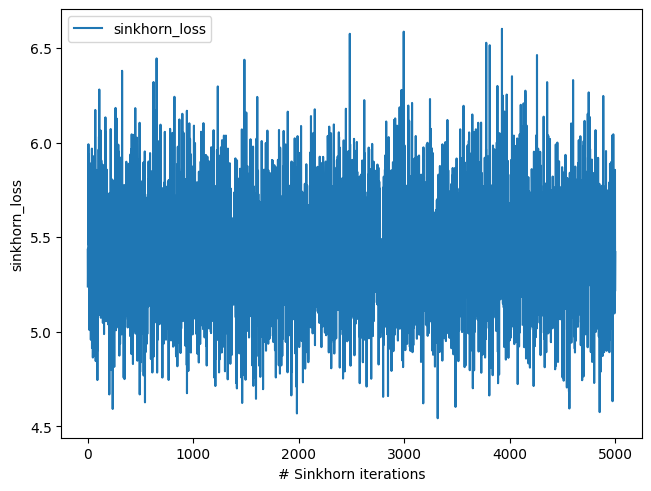

In [43]:
sinkhorn_loss_mar25 = torch.tensor(sinkhorn_loss_mar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

CMI and MAE vs Sinkhorn Iterations

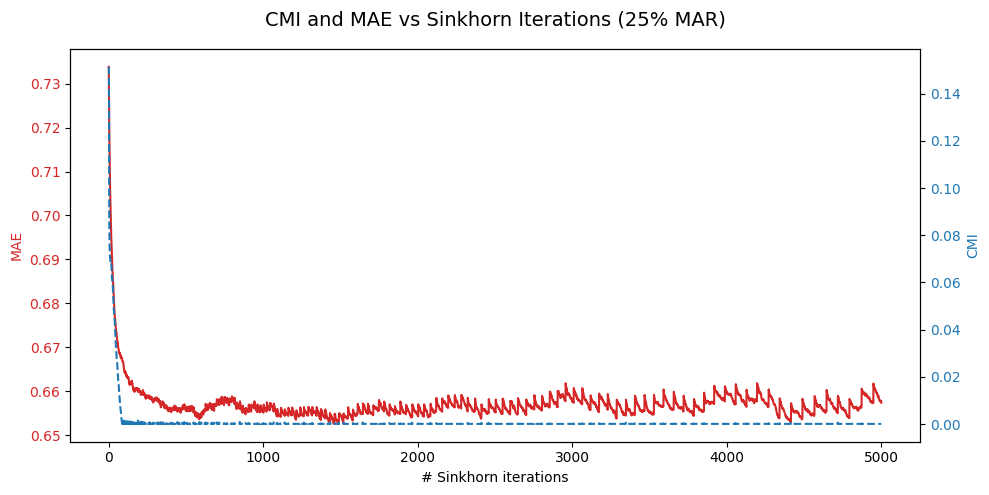

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with actual PyTorch tensors if needed)
# Convert to NumPy if these are tensors
cmi_array = cmi_loss_mar25
mae_array = sk_maes25mar

# Ensure both arrays are same length (or handle separately if needed)
npoints = min(len(cmi_array), len(mae_array))
x = np.linspace(0, 1, npoints) * npoints  # X-axis: Sinkhorn iterations

# Truncate both arrays to the same length for plotting
cmi_array = cmi_array[:npoints]
mae_array = mae_array[:npoints]

# Create a single plot with twin y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot MAE (left axis)
color = 'tab:red'
ax1.set_xlabel('# Sinkhorn iterations')
ax1.set_ylabel('MAE', color=color)
ax1.plot(x, mae_array, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# Plot CMI (right axis)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(x, cmi_array, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

# Titles and layout
fig.suptitle('CMI and MAE vs Sinkhorn Iterations (25% MAR)', fontsize=14)
fig.tight_layout()
plt.show()


MAE and CMI vs lambda_cmi

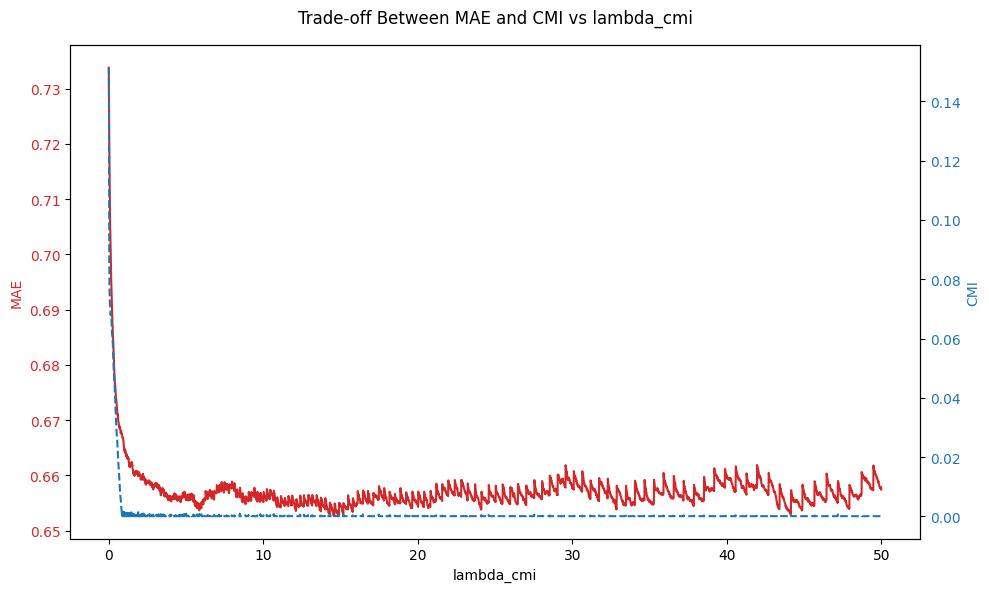

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated from your training log — you should replace these with actual histories
cmi_penalty_history = cmi_loss_mar25 # list of length 2000 from your model
mae_history = sk_maes25mar         # list of length 2000 from your model

iterations = np.arange(len(cmi_penalty_history))
lambda_cmi_values = lamda_cmi_mar25

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# MAE
color = 'tab:red'
ax1.set_xlabel('lambda_cmi')
ax1.set_ylabel('MAE', color=color)
ax1.plot(lambda_cmi_values, mae_history, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# CMI on same plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(lambda_cmi_values, cmi_penalty_history, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Trade-off Between MAE and CMI vs lambda_cmi')
fig.tight_layout()
plt.show()


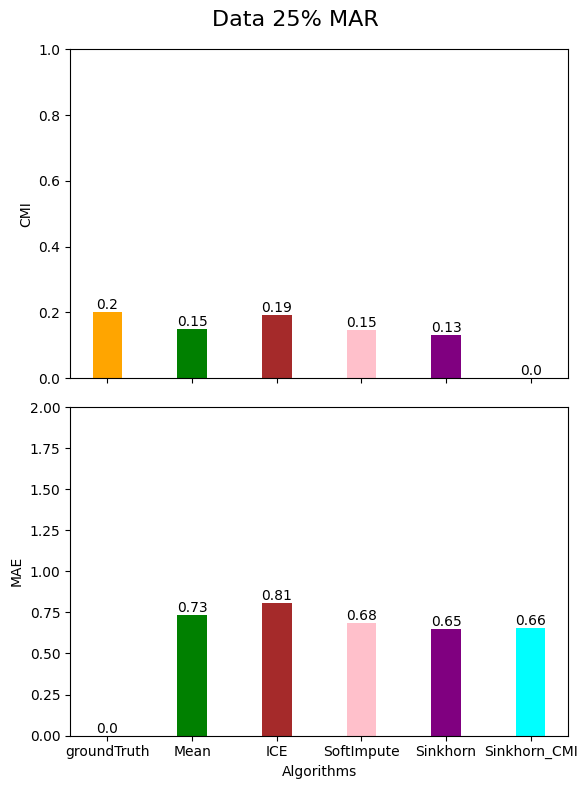

In [46]:

# Define values and categories
values_cmi_mar25 = [cmi_groundTruth.detach(),cmi_mean_mar25.detach(),cmi_ice_mar25.detach(),cmi_soft_mar25.detach(),on_cmi_missmar25.detach(),cmi_mar25.detach()]
values_maes_mar25 = [0.0,mean_mae_mar25.detach(),ice_mae_mar25.detach(), soft_mae_mar25.detach(),on_sk_mae_mar25.detach(),sk_mae_mar25.detach()]
categories = ["groundTruth","Mean","ICE","SoftImpute","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange','green','brown','pink','purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAE bars and add values on top
bars2 = ax2.bar(index, values_maes_mar25, color=colors, width=bar_width)
ax2.set_ylabel("MAE")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show() #display 


**25% MNAR**

In [ ]:
mean_age = groundTruth_scaled["age"].mean()
median_employment = groundTruth_scaled["employment-since"].median()
mean_credithistory = groundTruth_scaled["credit-history"].mean()
mean_residencesince = groundTruth_scaled["residence-since"].mean()
median_property = groundTruth_scaled["property"].median()
mean_checkingaccount = groundTruth_scaled["checking-account"].mean()
median_duration = groundTruth_scaled["duration"].median()
mean_creditamount = groundTruth_scaled["credit-amount"].mean()

mean_job = groundTruth_scaled["job"].mean()
median_otherinstallment = groundTruth_scaled["other-installment"].median()
mean_housing = groundTruth_scaled["housing"].mean()
median_purpose = groundTruth_scaled["purpose"].median()


dependencies_mnar = {
    "checking-account": {
        
        "condition": lambda row: True,
        "probability": lambda row: 0.5 if row["checking-account"] < mean_checkingaccount else 0.05
    },
    "duration": {
        
        "condition": lambda row: True,
        "probability": lambda row: 0.5 if row["duration"] <= median_duration  else 0.05
    },
    "savings-account": {
        
        "condition": lambda row: True,
        "probability": lambda row: 0.2 if row["savings-account"] != -0.13053135 else 0.1
    },
    "employment-since": {
        
         "condition": lambda row: True,
        "probability": lambda row: 0.2 if row["employment-since"] == median_employment else 0.1
    },
    "credit-amount": {
        
         "condition": lambda row: True,
        "probability": lambda row: 0.25 if row["credit-amount"] > mean_creditamount else 0.05
    },
    "job": {
        
         "condition": lambda row: True,
        "probability": lambda row: 0.25 if row["job"] < mean_job else 0.05
    },

    "other-installment": {
       
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["other-installment"] == median_otherinstallment else 0.2 
    },

    "housing": {
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["housing"] <= mean_housing else 0.2 
    },

    "other-debtors": {
       
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["other-debtors"]==-1.94597406  else 0.2 
    },

     "foreign-worker": {
        
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["foreign-worker"]==0.19601428 else 0.2 
    },
     "number-people-provide-maintenance-for": {
       
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["number-people-provide-maintenance-for"] == -0.42828957 else 0.2 
    },
     "sex": {
        
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["sex"] == 0.67028006 else 0.2 
    },

    "purpose": {
        
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["purpose"] < median_purpose else 0.2 
    }



}

"""""""""""

checking-account  [-0.4645937  -1.26286467  1.13194823  0.33367726]
duration [-1.23647786  2.24819436 -0.73866754  1.75038404  0.25695309  1.25257373
  0.75476341 -0.48976238 -0.9875727  -0.90460432 -1.15350947  3.243815
 -0.24085723  1.9992892  -0.82163593  0.50585825 -1.07054109  2.74600468
 -0.07492045 -0.57273077  1.00366857  0.00804793 -0.406794   -1.40241463
  2.16522598 -0.65569916  0.09101632  1.50147889  0.58882664 -1.31944625
  0.42288986  4.23943563  1.58444727]
credit-history [-1.03157831 -0.02220619  0.98716594  1.99653807  3.0059102 ]
purpose [ 1.15130343  0.04781771  0.41564629 -1.055668   -0.68783943 -1.42349657
 -0.32001086  1.519132    0.78347486  1.88696057]
savings-account [ 1.66990103 -0.13053135 -1.03074754  0.76968484 -1.93096373]
employment-since [ 1.09776229 -1.13497457 -0.39072895  1.84200791  0.35351667]
other-debtors [ 0.30110915 -1.94597406 -4.19305728]
residence-since [ 1.04698668 -0.76597727  0.14050471 -1.67245924]
property [-1.26399248 -0.44108071  0.38183106  1.20474283]
age [ 2.76645648 -1.19140394  1.18331231  0.8315025   1.53512213 -0.04802204
  2.23874176 -0.66368922 -0.92754658 -1.01549903  2.15078931 -0.3118794
  0.74355005 -0.39983186  1.09535986 -0.83959412  0.03993041  0.30378778
  0.56764514 -0.13597449  2.41464667 -0.75164167 -0.48778431  1.88693195
 -0.22392695  0.12788287  1.9748844  -1.10345149 -0.57573676  1.44716968
  1.27126477  0.91945495  1.35921722  0.47969268  0.39174023  2.67850403
  1.00740741  1.79897949  1.62307458 -1.36730885 -1.27935639  0.21583532
  3.03031385  2.59055158  3.38212366  2.85440894  0.65559759  1.71102704
  2.50259912  3.47007612 -1.4552613   2.32669422  2.06283685]
other-installment [ 0.21834568 -2.15497697  2.59166834]
housing [-0.13371046 -2.01695631  1.7495354 ]
existing-credits [ 1.02707891 -0.704926    2.75908382  4.49108873]
job [-0.68447267  0.53345023  1.75137314  2.96929604]
number-people-provide-maintenance-for [-0.42828957  2.33486893]
telephone [ 1.21459768 -0.82331789]
foreign-worker [ 0.19601428 -5.10166904]
sex [ 0.67028006 -1.49191369]
marital-status [-0.31831052  3.14158642]
class-label [ 0.65465367 -1.52752523]

"""""""""


'""\n\nchecking-account  [-0.4645937  -1.26286467  1.13194823  0.33367726]\nduration [-1.23647786  2.24819436 -0.73866754  1.75038404  0.25695309  1.25257373\n  0.75476341 -0.48976238 -0.9875727  -0.90460432 -1.15350947  3.243815\n -0.24085723  1.9992892  -0.82163593  0.50585825 -1.07054109  2.74600468\n -0.07492045 -0.57273077  1.00366857  0.00804793 -0.406794   -1.40241463\n  2.16522598 -0.65569916  0.09101632  1.50147889  0.58882664 -1.31944625\n  0.42288986  4.23943563  1.58444727]\ncredit-history [-1.03157831 -0.02220619  0.98716594  1.99653807  3.0059102 ]\npurpose [ 1.15130343  0.04781771  0.41564629 -1.055668   -0.68783943 -1.42349657\n -0.32001086  1.519132    0.78347486  1.88696057]\nsavings-account [ 1.66990103 -0.13053135 -1.03074754  0.76968484 -1.93096373]\nemployment-since [ 1.09776229 -1.13497457 -0.39072895  1.84200791  0.35351667]\nother-debtors [ 0.30110915 -1.94597406 -4.19305728]\nresidence-since [ 1.04698668 -0.76597727  0.14050471 -1.67245924]\nproperty [-1.26399

Generating MNAR 25%, and added the target coloumn with the 25% missing MNAR data

In [ ]:
generator_mnar25 = Inject_Missing_Values()
miss_mnar25,index_mnar25 = generator_mnar25.MNAR(X,dependencies_mnar,missing_rate=25)

miss_mnar25 = pd.concat([miss_mnar25, Y], axis=1) #adding the target coloumn

total_missing_percentage_mnar25 = miss_mnar25.isnull().sum().sum() / miss_mnar25.size * 100
print(f"Total Missing Percentage MNAR25: {total_missing_percentage_mnar25:.2f}%")

Total Missing Percentage MNAR25: 23.86%


In [49]:
missing_percentage = (miss_mnar25.isnull().sum() / len(miss_mnar25)) * 100
print(missing_percentage)

checking-account                         43.3
duration                                 42.6
credit-history                            0.0
purpose                                  51.7
credit-amount                            21.9
savings-account                          36.4
employment-since                         23.7
installment-rate                          0.0
other-debtors                            37.8
residence-since                           0.0
property                                  0.0
age                                       0.0
other-installment                        61.5
housing                                  64.1
existing-credits                          0.0
job                                      32.6
number-people-provide-maintenance-for    37.9
telephone                                 0.0
foreign-worker                           35.5
sex                                      36.0
marital-status                            0.0
class-label                       

In [50]:
miss_mnar25_numpy = miss_mnar25.to_numpy()
miss_mnar25_tensor = torch.tensor(miss_mnar25_numpy) #converting to tensor

Applying Sinkhorn algorithm to MNAR 25% data

In [51]:
#only Sinkhorn
n_mnar25, d_mnar25 = miss_mnar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mnar25 = pick_epsilon(miss_mnar25_tensor)
print(epsilon_mnar25)
mask_mnar25= torch.isnan(miss_mnar25_tensor).double()


on_sk_imputer_mnar25 = SinkhornImputation(eps=epsilon_mnar25, batchsize=batchsize, lr=lr, niter=5000)
on_sk_imp_mnar25, on_sk_maes25mnar, on_sk_rmses25mnar = on_sk_imputer_mnar25.fit_transform(miss_mnar25_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mnar25_numpy = on_sk_imp_mnar25.detach().cpu().numpy()
on_sk_mae_mnar25 = MAE(on_sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
on_sk_rmse_mnar25 = RMSE(on_sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
print("MAE:",on_sk_mae_mnar25)

INFO:root:batchsize = 128, epsilon = 0.7835


0.783533259541544


INFO:root:Iteration 0:	 Loss: 6.2150	 Validation MAE: 0.8157	RMSE: 1.0699
INFO:root:Iteration 50:	 Loss: 5.5859	 Validation MAE: 0.7523	RMSE: 1.0545
INFO:root:Iteration 100:	 Loss: 5.1364	 Validation MAE: 0.7373	RMSE: 1.0460
INFO:root:Iteration 150:	 Loss: 5.2907	 Validation MAE: 0.7295	RMSE: 1.0415
INFO:root:Iteration 200:	 Loss: 5.3628	 Validation MAE: 0.7252	RMSE: 1.0386
INFO:root:Iteration 250:	 Loss: 5.3490	 Validation MAE: 0.7220	RMSE: 1.0345
INFO:root:Iteration 300:	 Loss: 5.9713	 Validation MAE: 0.7200	RMSE: 1.0341
INFO:root:Iteration 350:	 Loss: 5.1635	 Validation MAE: 0.7199	RMSE: 1.0336
INFO:root:Iteration 400:	 Loss: 5.7739	 Validation MAE: 0.7182	RMSE: 1.0321
INFO:root:Iteration 450:	 Loss: 5.0572	 Validation MAE: 0.7180	RMSE: 1.0318
INFO:root:Iteration 500:	 Loss: 5.0875	 Validation MAE: 0.7163	RMSE: 1.0303
INFO:root:Iteration 550:	 Loss: 5.4857	 Validation MAE: 0.7163	RMSE: 1.0308
INFO:root:Iteration 600:	 Loss: 5.0586	 Validation MAE: 0.7155	RMSE: 1.0296
INFO:root:Itera

MAE: tensor(0.7121, grad_fn=<DivBackward0>)


CMI for Sinkhorn Imputation

In [52]:
#only CMI
on_cmi_missmnar25 = CMI.c_m_i(on_sk_imp_mnar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",on_cmi_missmnar25)
print("MAE:",on_sk_mae_mnar25)

H(X|Z): 1.6632045461332803, H(Y|Z): 0.3430817167980438, H(X,Y|Z): 1.7952242005592796
CMI: tensor(0.2111, grad_fn=<ClampBackward1>)
MAE: tensor(0.7121, grad_fn=<DivBackward0>)


Applying Sinkhorn-CMI algorithm to MNAR 25% data

In [53]:
#sinkhorn_CMI
n_mnar25, d_mnar25 = miss_mnar25_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mnar25 = pick_epsilon(miss_mnar25_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mnar25)
mask_mnar25 = torch.isnan(miss_mnar25_tensor).double()


sk_imputer_mnar25 = SinkhornImputation_CMI(eps = epsilon_mnar25, batchsize=batchsize, lr=lr, niter=5000,highest_lamda_cmi=500)
sk_imp_mnar25, sk_maes25mnar, sk_rmses25mnar,cmi_loss_mnar25, sinkhorn_loss_mnar25, lamda_cmi_mnar25 = sk_imputer_mnar25.fit_transform(miss_mnar25_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mnar25_numpy = sk_imp_mnar25.detach().cpu().numpy()

sk_mae_mnar25 = MAE(sk_imp_mnar25, groundTruth_tensor , mask_mnar25)
sk_rmse_mnar25 = RMSE(sk_imp_mnar25, groundTruth_tensor, mask_mnar25)
print("MAE:",sk_mae_mnar25)





0.783533259541544


INFO:root:Iteration 0:	 Loss: 5.1171	 Validation MAE: 0.8165	RMSE: 1.0718
INFO:root:Iteration 50:	 Loss: 5.6856	 Validation MAE: 0.7561	RMSE: 1.0568
INFO:root:Iteration 100:	 Loss: 5.4253	 Validation MAE: 0.7443	RMSE: 1.0526
INFO:root:Iteration 150:	 Loss: 5.6189	 Validation MAE: 0.7393	RMSE: 1.0512
INFO:root:Iteration 200:	 Loss: 5.4017	 Validation MAE: 0.7369	RMSE: 1.0508
INFO:root:Iteration 250:	 Loss: 5.9437	 Validation MAE: 0.7371	RMSE: 1.0508
INFO:root:Iteration 300:	 Loss: 5.3673	 Validation MAE: 0.7367	RMSE: 1.0520
INFO:root:Iteration 350:	 Loss: 5.6340	 Validation MAE: 0.7374	RMSE: 1.0525
INFO:root:Iteration 400:	 Loss: 6.0756	 Validation MAE: 0.7378	RMSE: 1.0530
INFO:root:Iteration 450:	 Loss: 6.4614	 Validation MAE: 0.7382	RMSE: 1.0533
INFO:root:Iteration 500:	 Loss: 5.6136	 Validation MAE: 0.7387	RMSE: 1.0539
INFO:root:Iteration 550:	 Loss: 5.5260	 Validation MAE: 0.7392	RMSE: 1.0546
INFO:root:Iteration 600:	 Loss: 5.9467	 Validation MAE: 0.7390	RMSE: 1.0545
INFO:root:Itera

MAE: tensor(0.7564, grad_fn=<DivBackward0>)


CMI for Sinkhorn_CMI Imputation

In [54]:
#CMI
cmi_mnar25 = CMI.c_m_i(sk_imp_mnar25, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_mnar25)
print("MAE:",sk_mae_mnar25)

H(X|Z): 1.344821599716437, H(Y|Z): 0.17216903655852178, H(X,Y|Z): 1.5174225547561067
CMI: tensor(0.0001, grad_fn=<ClampBackward1>)
MAE: tensor(0.7564, grad_fn=<DivBackward0>)


Mean Imputation, CMI and MAE

In [55]:

mean_imp_mnar25 = SimpleImputer().fit_transform(miss_mnar25_tensor)
mean_imp_mnar25_torch = torch.tensor(mean_imp_mnar25)
mean_mae_mnar25 = MAE(mean_imp_mnar25_torch, groundTruth_tensor , mask_mnar25)

print("MAE:",mean_mae_mnar25)

cmi_mean_mnar25 = CMI.c_m_i(mean_imp_mnar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_mean_mnar25)

MAE: tensor(0.8149, grad_fn=<DivBackward0>)
H(X|Z): 1.8433832216766337, H(Y|Z): 0.38794605843614516, H(X,Y|Z): 2.0118328063249606
CMI: tensor(0.2195, grad_fn=<ClampBackward1>)


Imputation by Chained Equations, CMI and MAE

In [56]:
ice_imp_mnar25 = IterativeImputer(random_state=0, max_iter=500).fit_transform(miss_mnar25_tensor)
ice_imp_mnar25_torch = torch.tensor(ice_imp_mnar25)
ice_mae_mnar25 = MAE(ice_imp_mnar25_torch, groundTruth_tensor , mask_mnar25)
print("MAE:",ice_mae_mnar25)

cmi_ice_mnar25 = CMI.c_m_i(ice_imp_mnar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_ice_mnar25)

MAE: tensor(0.8422, grad_fn=<DivBackward0>)
H(X|Z): 1.6029964249986817, H(Y|Z): 0.3493365167576803, H(X,Y|Z): 1.7001728670471454
CMI: tensor(0.2522, grad_fn=<ClampBackward1>)


Soft Imputation CMI and MAE

In [57]:
cv_error_mnar25, grid_lambda_mnar25 = cv_softimpute(miss_mnar25_numpy, grid_len=15)
lbda_mnar25 = grid_lambda_mnar25[np.argmin(cv_error_mnar25)]
soft_imp_mnar25 = softimpute((miss_mnar25_numpy), lbda_mnar25)[1]
soft_imp_mnar25_torch = torch.tensor(soft_imp_mnar25)

soft_mae_mnar25 = MAE(soft_imp_mnar25_torch, groundTruth_tensor , mask_mnar25)
print("MAE:",soft_mae_mnar25)

cmi_soft_mnar25 = CMI.c_m_i(soft_imp_mnar25_torch, bucket_specs, X_cols, Y_cols, Z_cols)
print("CMI:",cmi_soft_mnar25)

MAE: tensor(0.6599, grad_fn=<DivBackward0>)
H(X|Z): 1.7878901500915791, H(Y|Z): 0.35370490544661504, H(X,Y|Z): 1.917645534306395
CMI: tensor(0.2239, grad_fn=<ClampBackward1>)


### Visualization

Sinkhorn loss vs Sinkhorn Interations

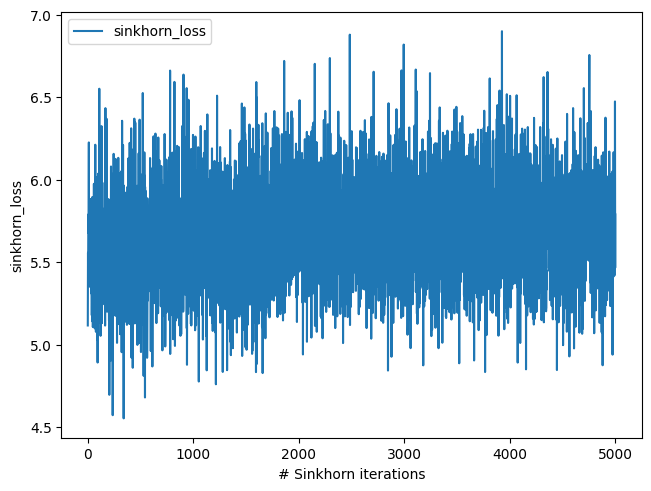

In [58]:
sinkhorn_loss_mnar25 = torch.tensor(sinkhorn_loss_mnar25)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mnar25)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mnar25.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

CMI and MAE vs Sinkhorn Iterations

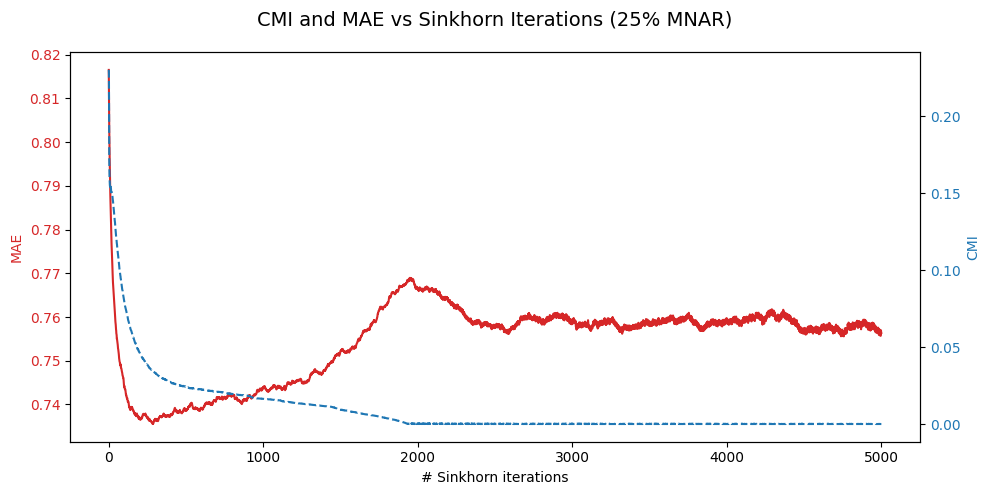

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with actual PyTorch tensors if needed)
# Convert to NumPy if these are tensors
cmi_array = cmi_loss_mnar25
mae_array = sk_maes25mnar

# Ensure both arrays are same length (or handle separately if needed)
npoints = min(len(cmi_array), len(mae_array))
x = np.linspace(0, 1, npoints) * npoints  # X-axis: Sinkhorn iterations

# Truncate both arrays to the same length for plotting
cmi_array = cmi_array[:npoints]
mae_array = mae_array[:npoints]

# Create a single plot with twin y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot MAE (left axis)
color = 'tab:red'
ax1.set_xlabel('# Sinkhorn iterations')
ax1.set_ylabel('MAE', color=color)
ax1.plot(x, mae_array, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# Plot CMI (right axis)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(x, cmi_array, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

# Titles and layout
fig.suptitle('CMI and MAE vs Sinkhorn Iterations (25% MNAR)', fontsize=14)
fig.tight_layout()
plt.show()


MAE and CMI vs lambda_cmi

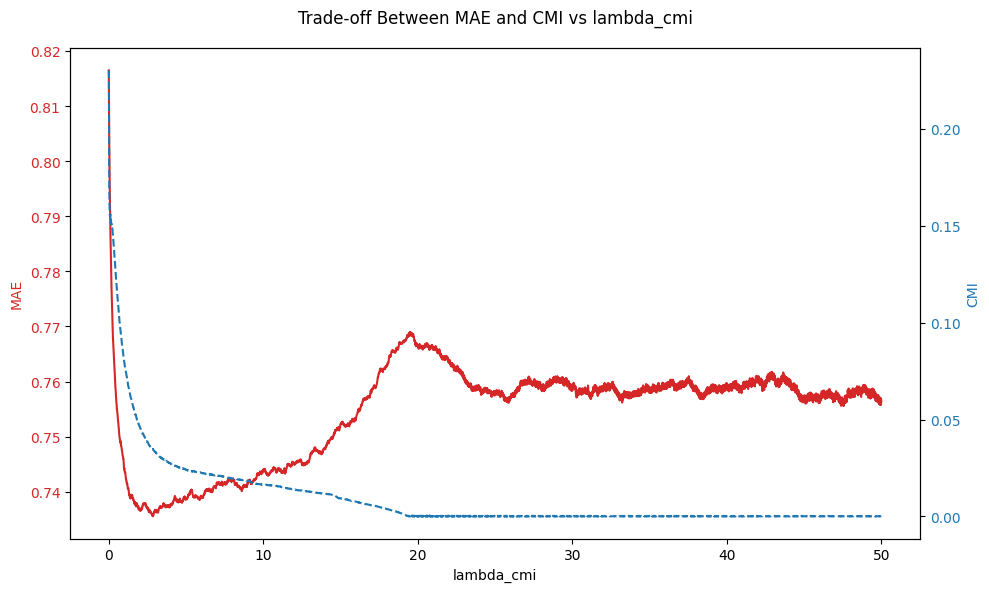

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated from your training log — you should replace these with actual histories
cmi_penalty_history = cmi_loss_mnar25 # list of length 2000 from your model
mae_history = sk_maes25mnar         # list of length 2000 from your model

iterations = np.arange(len(cmi_penalty_history))
lambda_cmi_values = lamda_cmi_mnar25

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# MAE
color = 'tab:red'
ax1.set_xlabel('lambda_cmi')
ax1.set_ylabel('MAE', color=color)
ax1.plot(lambda_cmi_values, mae_history, color=color, label='MAE')
ax1.tick_params(axis='y', labelcolor=color)

# CMI on same plot
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CMI', color=color)
ax2.plot(lambda_cmi_values, cmi_penalty_history, color=color, linestyle='--', label='CMI')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Trade-off Between MAE and CMI vs lambda_cmi')
fig.tight_layout()
plt.show()


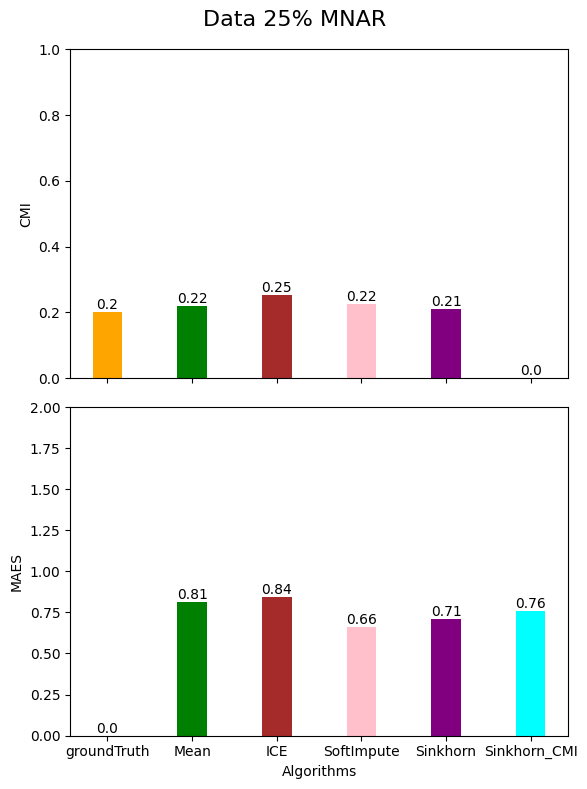

In [61]:

# Define values and categories
values_cmi_mnar25 = [cmi_groundTruth.detach(),cmi_mean_mnar25.detach(),cmi_ice_mnar25.detach(),cmi_soft_mnar25.detach(),on_cmi_missmnar25.detach(),cmi_mnar25.detach()]
values_maes_mnar25 = [0.0,mean_mae_mnar25.detach(),ice_mae_mnar25.detach(), soft_mae_mnar25.detach(),on_sk_mae_mnar25.detach(),sk_mae_mnar25.detach()]
categories = ["groundTruth","Mean","ICE","SoftImpute","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange','green','brown','pink','purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 25% MNAR', fontsize=16)

# Plot CMI bars and add values on top
bars1 = ax1.bar(index, values_cmi_mnar25, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot MAES bars and add values on top
bars2 = ax2.bar(index, values_maes_mnar25, color=colors, width=bar_width)
ax2.set_ylabel("MAES")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()


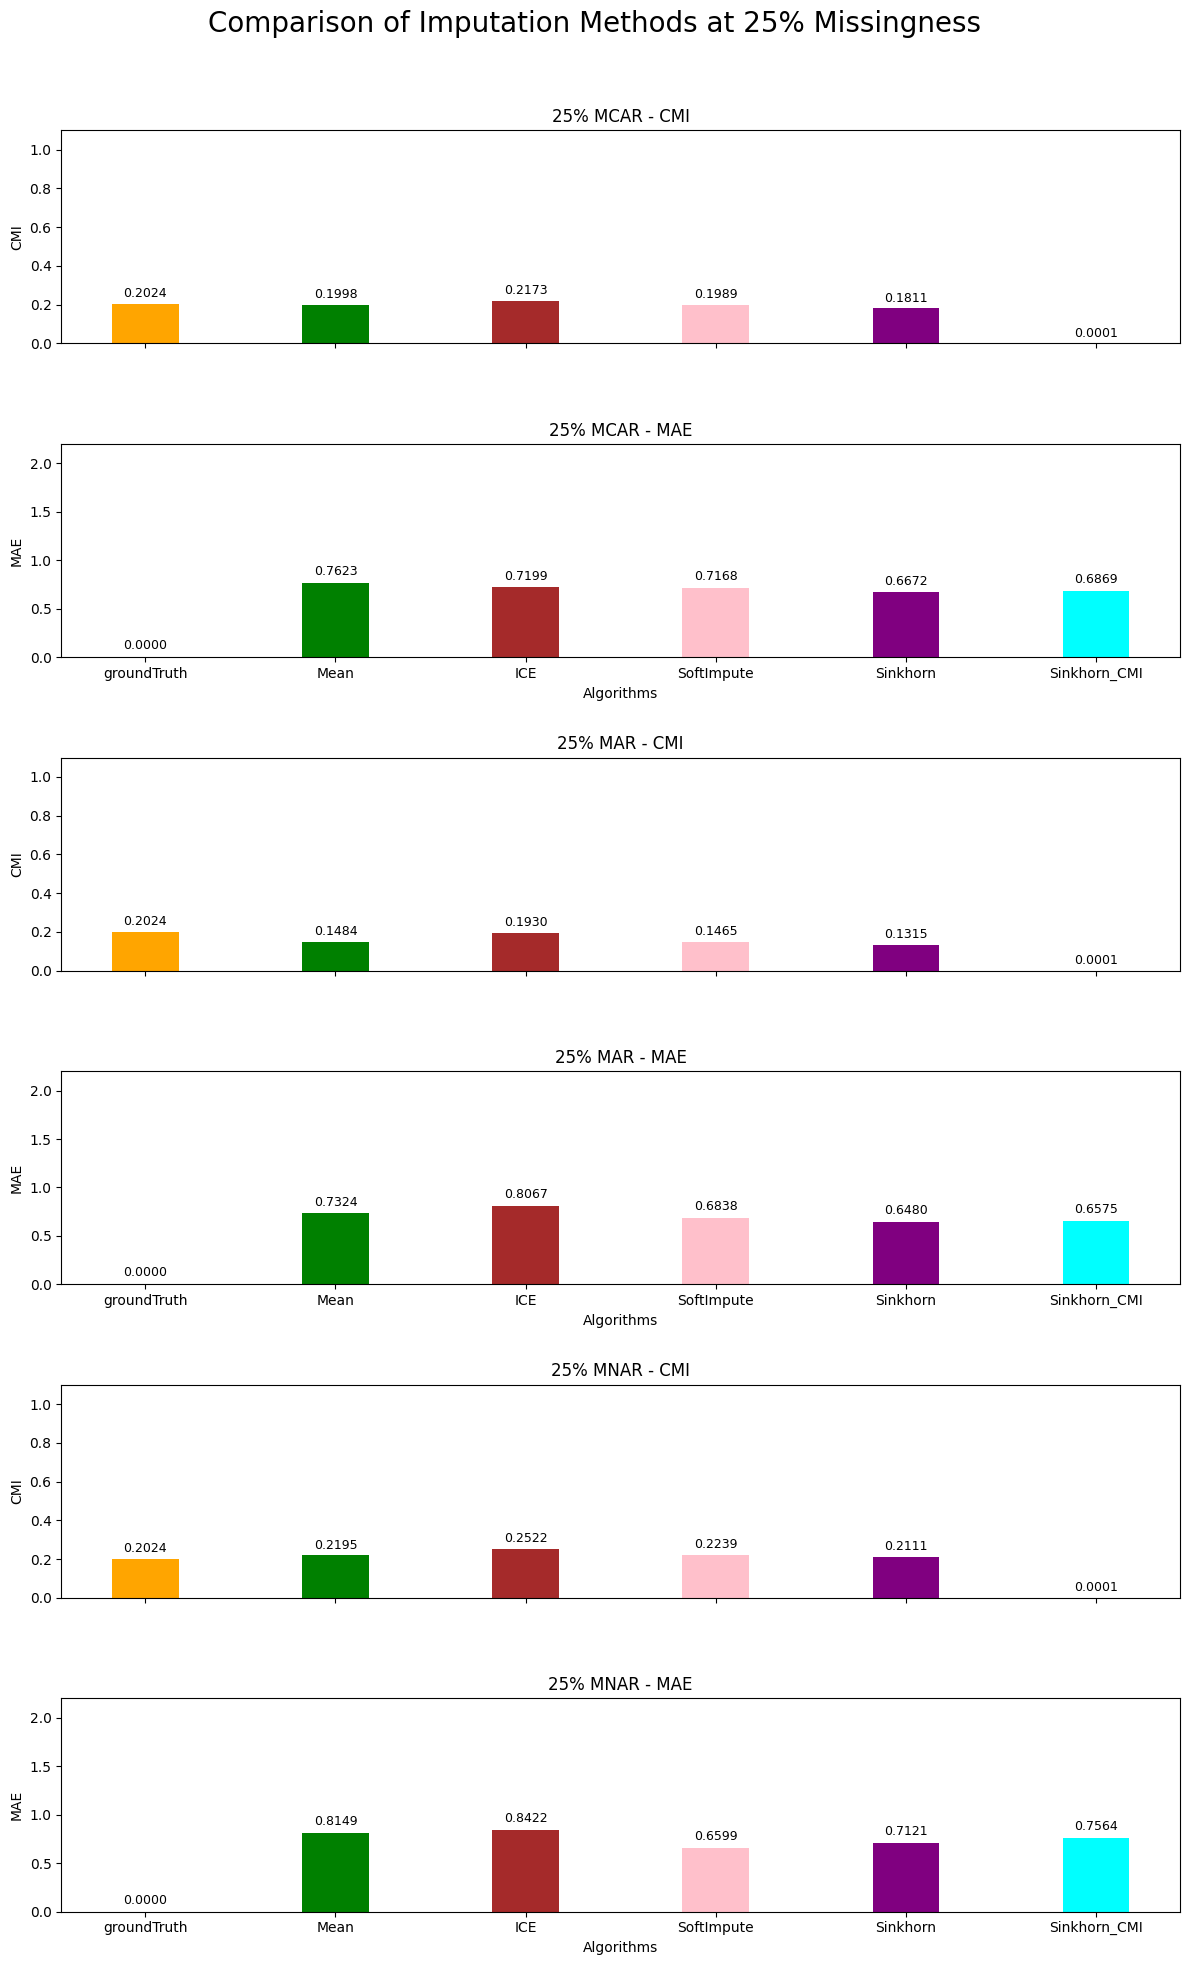

In [62]:
fig, axes = plt.subplots(6, 1, figsize=(12, 20), sharex=False)
fig.suptitle('Comparison of Imputation Methods at 25% Missingness', fontsize=20)

# MCAR, MAR, MNAR order
plot_data = [
    ("25% MCAR", values_cmi_mcar25, values_maes_mcar25),
    ("25% MAR", values_cmi_mar25, values_maes_mar25),
    ("25% MNAR", values_cmi_mnar25, values_maes_mnar25),
]

for i, (title, cmi_vals, mae_vals) in enumerate(plot_data):
    ax_cmi = axes[i * 2]
    ax_mae = axes[i * 2 + 1]

    # ----------------- CMI Plot -----------------
    bars1 = ax_cmi.bar(index, cmi_vals, color=colors, width=bar_width)
    ax_cmi.set_ylabel("CMI")
    ax_cmi.set_ylim(0, 1.1)
    ax_cmi.set_title(f"{title} - CMI")
    for bar in bars1:
        yval = bar.get_height()
        ax_cmi.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.4f}", ha='center', va='bottom', fontsize=9)

    # Remove x-axis labels and ticks for CMI
    ax_cmi.set_xticks(index)
    ax_cmi.set_xticklabels([])

    # ----------------- MAE Plot -----------------
    bars2 = ax_mae.bar(index, mae_vals, color=colors, width=bar_width)
    ax_mae.set_ylabel("MAE")
    ax_mae.set_ylim(0, 2.2)
    ax_mae.set_title(f"{title} - MAE")
    for bar in bars2:
        yval = bar.get_height()
        ax_mae.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, f"{yval:.4f}", ha='center', va='bottom', fontsize=9)

    ax_mae.set_xticks(index)
    ax_mae.set_xticklabels(categories, fontsize=10, rotation=0)
    ax_mae.set_xlabel("Algorithms")

plt.tight_layout(rect=[0, 0, 1, 0.96], h_pad=2.5)
plt.show()


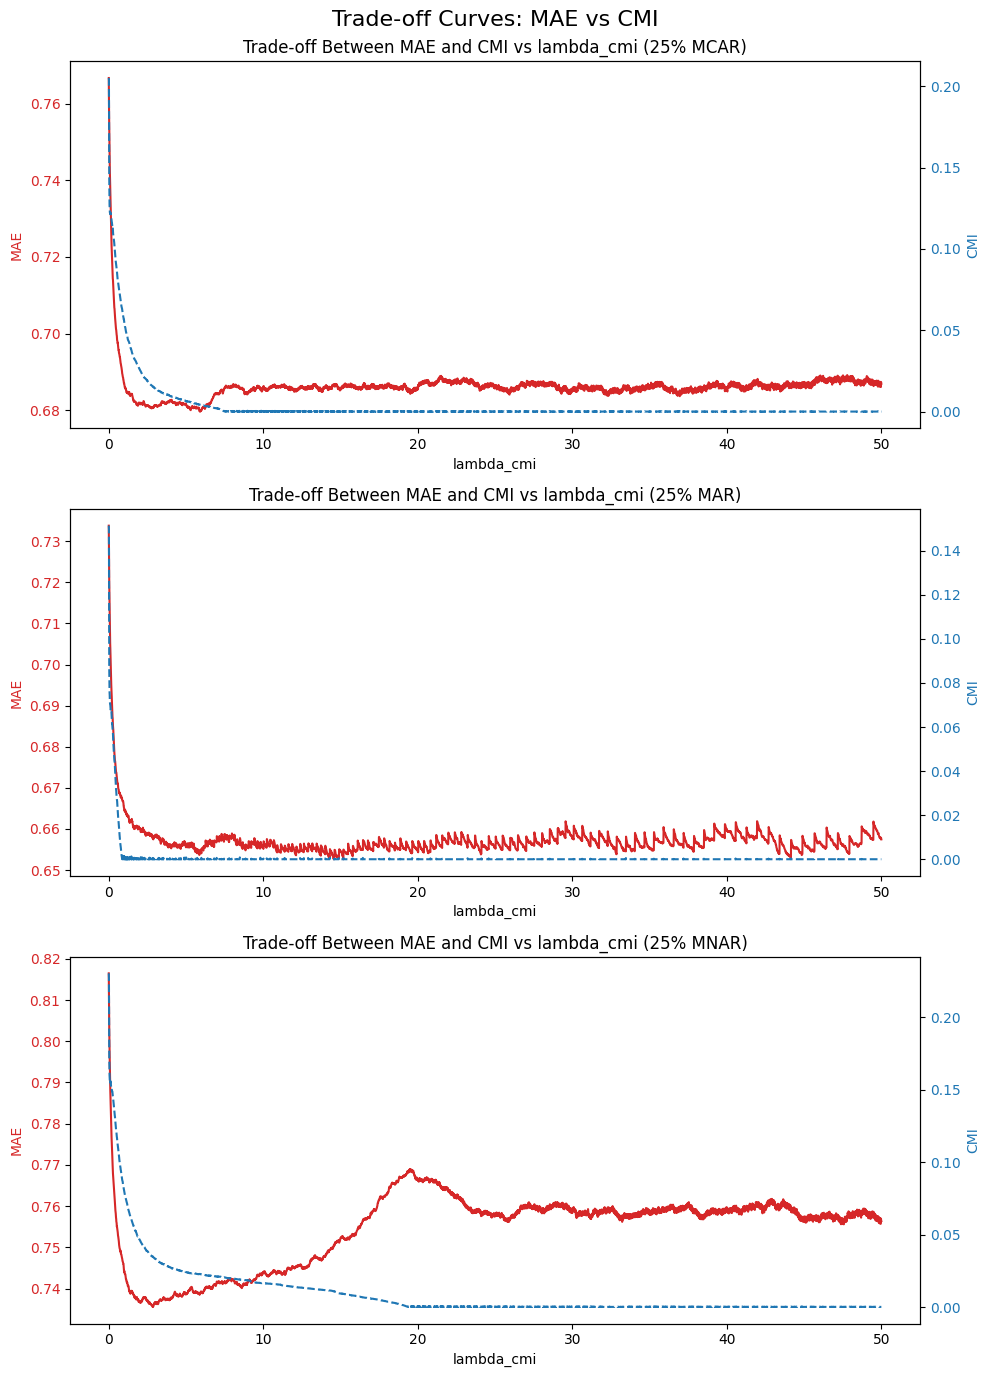

In [63]:
fig, axes = plt.subplots(3, 1, figsize=(10, 14))

# New order: MCAR, MAR, MNAR
datasets = [
    ("25% MCAR", lamda_cmi_mcar25, sk_maes25mcar, cmi_loss_mcar25),
    ("25% MAR", lamda_cmi_mar25, sk_maes25mar, cmi_loss_mar25),
    ("25% MNAR", lamda_cmi_mnar25, sk_maes25mnar, cmi_loss_mnar25),
]

for i, (title, lambda_vals, mae_vals, cmi_vals) in enumerate(datasets):
    ax1 = axes[i]
    ax2 = ax1.twinx()

    # MAE (left y-axis)
    ax1.set_ylabel('MAE', color='tab:red')
    ax1.plot(lambda_vals, mae_vals, color='tab:red', label='MAE')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    # CMI (right y-axis)
    ax2.set_ylabel('CMI', color='tab:blue')
    ax2.plot(lambda_vals, cmi_vals, color='tab:blue', linestyle='--', label='CMI')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    ax1.set_title(f'Trade-off Between MAE and CMI vs lambda_cmi ({title})')
    ax1.set_xlabel('lambda_cmi')

plt.tight_layout(rect=[0, 0, 1, 0.97])
fig.suptitle('Trade-off Curves: MAE vs CMI', fontsize=16)
plt.show()
